# Customer Lifetime Value Analysis

## Objective:
-> Make visualization for distribution of customer acquisition cost.

-> Create visualization for revenue generated by the customers.

-> Compare the acquisition cost by various channels.

-> Calculate the total revenue generated by each channel.

-> Calculate the return of investment by each channel.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("/content/drive/MyDrive/data/customer_lifetime_value_analysis/customer_data.csv")

In [47]:
df.head(5)

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [48]:
df.tail(5)

,customer_id,channel,cost,conversion_rate,revenue
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813
799,800,email marketing,5.246263,0.043822,4820


In [49]:
df.shape

(800, 5)

In [50]:
df.isnull().sum() # for series

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [51]:
df.isna().sum() # for dataframe

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [52]:
df.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


In [53]:
channel_type = df["channel"].unique()
channel_type

array(['referral', 'paid advertising', 'email marketing', 'social media'],
      dtype=object)

In [54]:
channel_type_number = df["channel"].nunique()
channel_type_number

4

In [55]:
channel_counts = df['channel'].value_counts()
channel_counts

email marketing     214
referral            207
paid advertising    194
social media        185
Name: channel, dtype: int64

In [56]:
channel_counts.index
channel_counts.values

array([214, 207, 194, 185])

Text(0.5, 1.0, 'Distribution of Channel ')

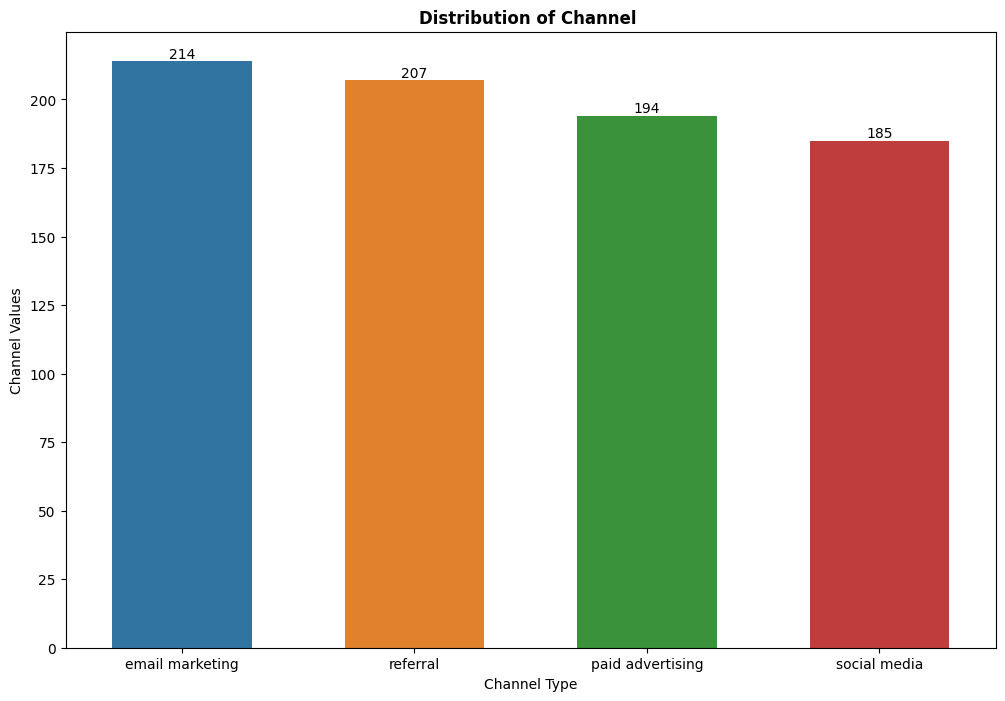

In [57]:
plt.figure(figsize=(12,8))

ax = sns.barplot(x = channel_counts.index, y = channel_counts.values, width = 0.6)

for bars in ax.containers:
  ax.bar_label(bars)

plt.xlabel("Channel Type")
plt.ylabel("Channel Values")
plt.title("Distribution of Channel ", fontweight = 'bold')

In [58]:
cost_count = df['cost'].value_counts()
cost_count

5.246263     214
8.320327     207
30.450327    194
9.546326     185
Name: cost, dtype: int64

Text(0.5, 1.0, 'Distribution of Cost')

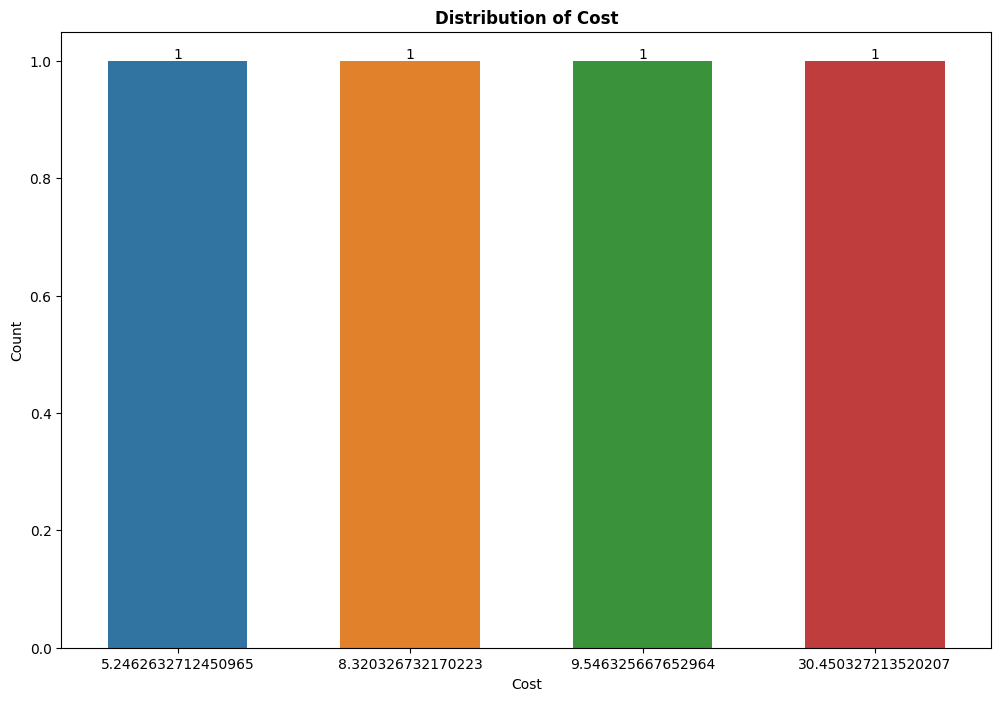

In [59]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(x =cost_count.index, y = cost_count.value_counts(), width = 0.6)

for bars in ax.containers:
  ax.bar_label(bars)

plt.xlabel('Cost')
plt.ylabel('Count')
plt.title('Distribution of Cost', fontweight = 'bold')

### Customer Acquisition cost

Text(0.5, 1.0, 'Distribution of Customer Acquisition cost')

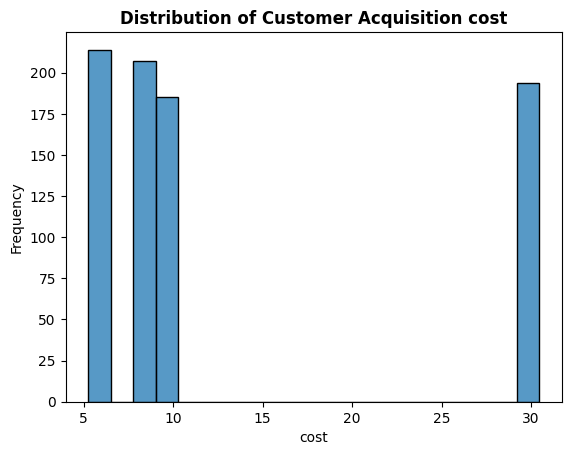

In [60]:
#plt.figure(figsize=(8,5))

ax = sns.histplot(df['cost'], kde=False, bins=20 )

plt.ylabel('Frequency')
plt.title("Distribution of Customer Acquisition cost", fontweight='bold')

### Revenue Generation

Text(0.5, 1.0, 'Distribution of revenue generated')

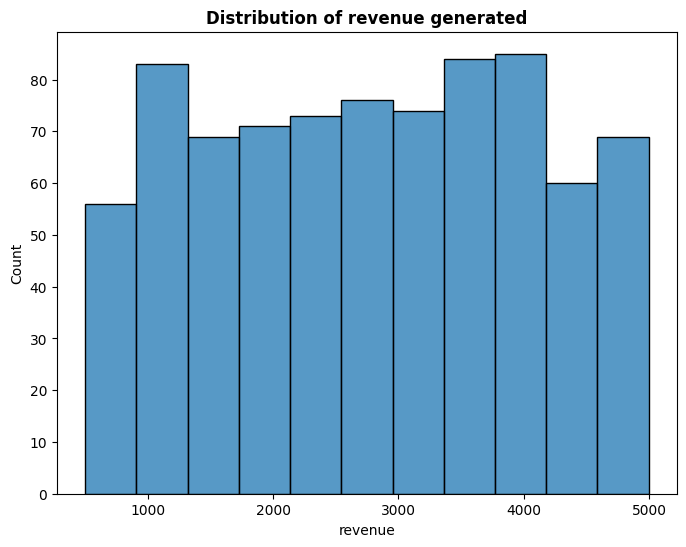

In [61]:
plt.figure(figsize=(8,6))

ax = sns.histplot(df['revenue'], kde=False)
plt.title('Distribution of revenue generated', fontweight='bold')

### Cost of Acquisition of channels.

In [62]:
df.head(5)

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [63]:
cost_channel = df.groupby('channel')['cost'].mean()
cost_channel

channel
email marketing      5.246263
paid advertising    30.450327
referral             8.320327
social media         9.546326
Name: cost, dtype: float64

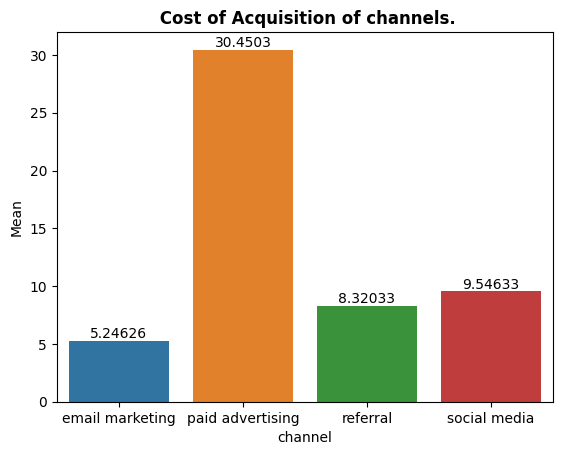

In [64]:


ax = sns.barplot(x = cost_channel.index, y= cost_channel.values, )
plt.ylabel("Mean")
plt.title(" Cost of Acquisition of channels.", fontweight = 'bold')

for bars in ax.containers:
  ax.bar_label(bars)

### Revenue generated by channels.


In [65]:
revenue_channel = df.groupby('channel')['revenue'].mean()
revenue_channel

channel
email marketing     2825.728972
paid advertising    2826.783505
referral            2751.458937
social media        2663.064865
Name: revenue, dtype: float64

Text(0, 0.5, 'Revenue')

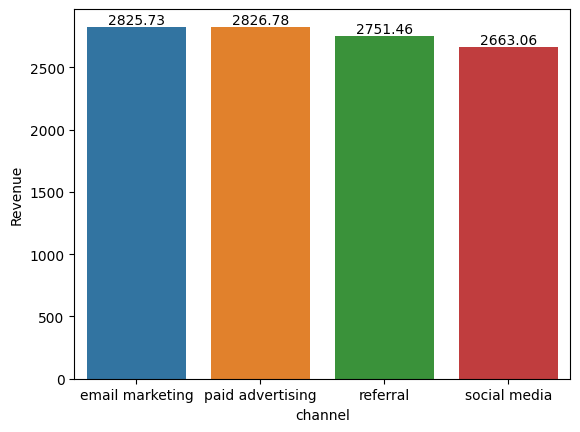

In [66]:
ax = sns.barplot(x = revenue_channel.index, y = revenue_channel.values, )

for bars in ax.containers:
  ax.bar_label(bars)

plt.ylabel("Revenue")

### Customer conversion rate


In [67]:
df.head(3)

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164


In [68]:
conversion = df.groupby('channel')['conversion_rate'].mean()
conversion

channel
email marketing     0.043822
paid advertising    0.016341
referral            0.123145
social media        0.167592
Name: conversion_rate, dtype: float64

Text(0, 0.5, 'conversion_rate')

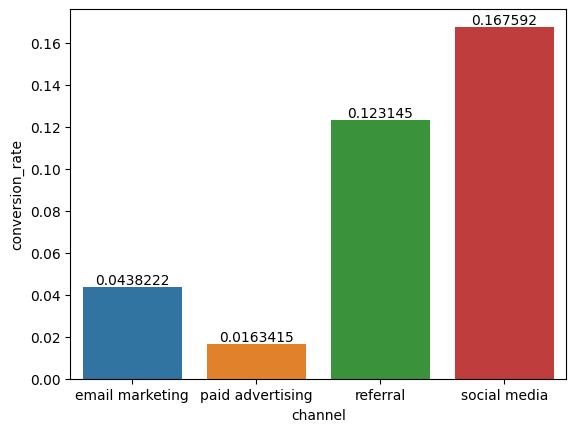

In [69]:
ax = sns.barplot(x = conversion.index, y = conversion.values, )

for bars in ax.containers:
  ax.bar_label(bars)

plt.ylabel("conversion_rate")

### ROI


In [70]:
df.head(3)

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164


In [71]:
df['ROI'] = 0

In [72]:
df.head(3)

,customer_id,channel,cost,conversion_rate,revenue,ROI
0,1,referral,8.320327,0.123145,4199,0
1,2,paid advertising,30.450327,0.016341,3410,0
2,3,email marketing,5.246263,0.043822,3164,0


In [73]:
df['ROI'] = df['revenue'] / df['cost']
df.head(3)

,customer_id,channel,cost,conversion_rate,revenue,ROI
0,1,referral,8.320327,0.123145,4199,504.667681
1,2,paid advertising,30.450327,0.016341,3410,111.985660
2,3,email marketing,5.246263,0.043822,3164,603.095925


In [74]:
roi = df.groupby('channel')['ROI'].mean()
roi

channel
email marketing     538.617455
paid advertising     92.832615
referral            330.691213
social media        278.962290
Name: ROI, dtype: float64

Text(0, 0.5, 'roi')

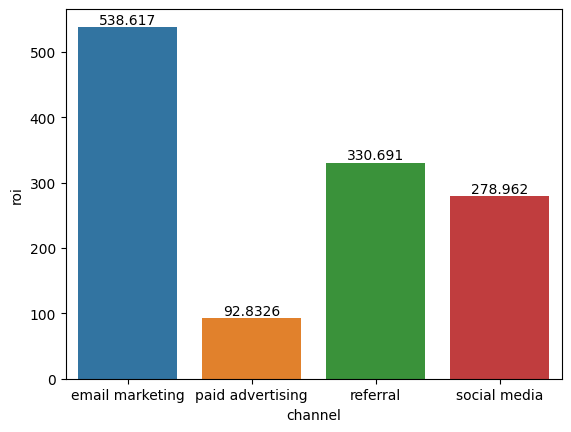

In [75]:
ax = sns.barplot(x = roi.index, y = roi.values, )

for bars in ax.containers:
  ax.bar_label(bars)

plt.ylabel("roi")